## Analysis & EDA of Adwords data
Deep dive classical analytics of the following dataset
* https://www.kaggle.com/loveall/clicks-conversion-tracking
* [Reference notebook](https://www.kaggle.com/chrisbow/an-introduction-to-facebook-ad-analysis-using-r) -> work with client to ensure insights are relevant and actionable, important to understand what type of margins the client is working with across its product mix

The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

## EDA
Lets first explore the dataset. Initial impression is it is very small

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
pd.__version__

'0.23.4'

In [3]:
ls

EDA.ipynb  KAG_conversion_data.csv  README.md


In [4]:
df = pd.read_csv('KAG_conversion_data.csv')

In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
rows = df.shape[0]
rows

1143

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


### Gender

In [8]:
df['gender'].describe()

count     1143
unique       2
top          M
freq       592
Name: gender, dtype: object

In [9]:
pct_male = int(100*df['gender'][df['gender'] == 'M'].count()/df['gender'].count())
pct_male

51

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['gender'])

LabelEncoder()

In [11]:
le.classes_

array(['F', 'M'], dtype=object)

0 -> female

1 -> male

In [12]:
df['gender_encoded'] = le.transform(df['gender'])

In [13]:
df[['gender_encoded', 'gender']].iloc[74:80]

,gender_encoded,gender
74,1,M
75,1,M
76,1,M
77,0,F
78,0,F
79,0,F


Pretty evenly balanced male/female. Encode as 0,1 using https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

### Spend
Amount paid by company xyz to Facebook, to show that ad.

In [14]:
df['Spent'].describe()

count    1143.000000
mean       51.360656
std        86.908418
min         0.000000
25%         1.480000
50%        12.370000
75%        60.025000
max       639.949998
Name: Spent, dtype: float64

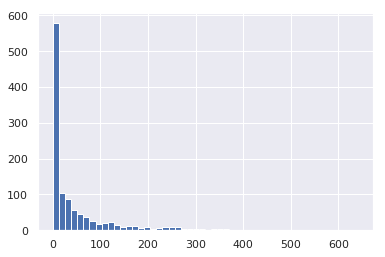

In [15]:
df['Spent'].hist(bins=50);

large number of zero spend. How about higher spends?

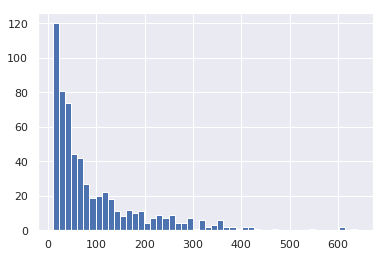

In [16]:
df['Spent'][df['Spent'] > 10].hist(bins=50);

### Unique ads
All adds have unique ad_id..

In [17]:
unique_ads = len(df['ad_id'].unique())
unique_ads

1143

## fb_campaign_id

In [18]:
unique_fb = len(df['fb_campaign_id'].unique())
unique_fb

691

Many campaigns, how many entries?

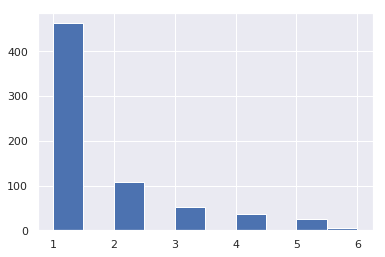

In [19]:
df.groupby('fb_campaign_id').count()['age'].hist();

Most campaigns have a single entry only

## xyzcampaignid
Company campaign id

In [20]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

OK so only 3 campaigns by company

In [21]:
df.groupby('xyz_campaign_id').count()['age']#.hist();

xyz_campaign_id
916      54
936     464
1178    625
Name: age, dtype: int64

Company total spend by campaign (put in its own dataframe for results)

In [22]:
df_xyz_campaign = df.groupby('xyz_campaign_id').sum()['Spent']
df_xyz_campaign = df_xyz_campaign.to_frame()
df_xyz_campaign

,Spent
xyz_campaign_id,
916,149.710001
936,2893.369999
1178,55662.149959


Get number of ads

In [23]:
df_xyz_campaign = df_xyz_campaign.join(df.groupby('xyz_campaign_id').count()['age'])

Mean Conversions by campaign

In [24]:
df_xyz_campaign = df_xyz_campaign.join(df.groupby('xyz_campaign_id').mean()['Total_Conversion'])

In [25]:
df_xyz_campaign = df_xyz_campaign.rename(columns={"Spent": "total_spend", "age": "number_of_ads", "Total_Conversion":"mean_conversion"})

In [26]:
df_xyz_campaign['spend_per_ad'] = df_xyz_campaign['total_spend']/df_xyz_campaign['number_of_ads']

In [27]:
df_xyz_campaign

,total_spend,number_of_ads,mean_conversion,spend_per_ad
xyz_campaign_id,,,,
916,149.710001,54,1.074074,2.772407
936,2893.369999,464,1.157328,6.235711
1178,55662.149959,625,4.270400,89.059440


In [28]:
df_xyz_campaign['ROI'] = df_xyz_campaign['mean_conversion']/df_xyz_campaign['spend_per_ad']
df_xyz_campaign

,total_spend,number_of_ads,mean_conversion,spend_per_ad,ROI
xyz_campaign_id,,,,,
916,149.710001,54,1.074074,2.772407,0.387416
936,2893.369999,464,1.157328,6.235711,0.185597
1178,55662.149959,625,4.270400,89.059440,0.047950


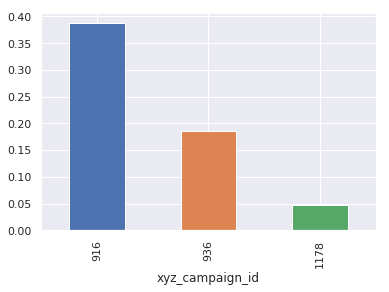

In [29]:
df_xyz_campaign['ROI'].plot.bar();

Campaign 916 was most successful from ROI but ran limited number of ads

## age

In [30]:
ages = df['age'].unique()
print(ages)

['30-34' '35-39' '40-44' '45-49']


In [31]:
df.groupby('age').count()['ad_id']

age
30-34    426
35-39    248
40-44    210
45-49    259
Name: ad_id, dtype: int64

More under 40s than over. Replace ranges with mean age

In [32]:
df['age_mean'] = df['age'].replace(to_replace={'30-34': 32, '35-39':37, '40-44':42, '45-49':47})

In [33]:
# df[['age_mean', 'age']] correct

## Drop unencoded data
Now we have numeric data

In [34]:
df = df.drop(columns=['age', 'gender'])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_encoded,age_mean
0,708746,916,103916,15,7350,1,1.43,2,1,1,32
1,708749,916,103917,16,17861,2,1.82,2,0,1,32
2,708771,916,103920,20,693,0,0.00,1,0,1,32
3,708815,916,103928,28,4259,1,1.25,1,0,1,32
4,708818,916,103928,28,4133,1,1.29,1,1,1,32


## Visualise dataset
As per reference notebook we can vis the relationships in the data with a clustermap, but we must normalise the data first -> beware sensitivity to outliers
* https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [36]:
type(scaler.fit_transform(df)) ## the values are transformed but we do not get back a dataframe

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


numpy.ndarray

In [37]:
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


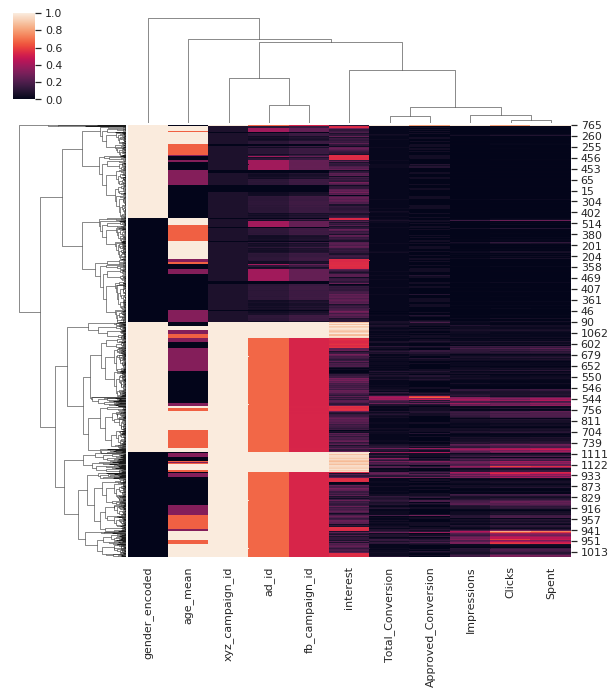

In [38]:
sns.clustermap(df_norm);

The clusters make sense - conversions are together, clicks and spent are together, ids are together

## Feature engineering
again copying our reference noteook

1) **Click-through-rate (CTR)**. This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.

2) **Conversion Rate (CR)**. This is the percentage of clicks that result in a 'conversion'. What a conversion is will be determined by the objectives of the campaign. It could be a sale, someone completing a contact form on a landing page, downloading an e-book, watching a video, or simply spending more than a particular amount of time or viewing over a target number of pages on a website.

3) **Cost Per Click (CPC)**. Self-explanatory this one: how much (on average) did each click cost. While it can often be seen as desirable to reduce the cost per click, the CPC needs to be considered along with other variables. For example, a campaign with an average CPC of £0.5 and a CR of 5% is likely achieving more with its budget than one with a CPC of £0.2 and a CR of 1% (assuming the conversion value is the same.

4) Cost Per Conversion. Another simple metric, this figure is often more relevant than the CPC, as it combines the CPC and CR metrics, giving us an easy way to quickly get a feel for campaign effectiveness.

5) Cost Per Mille (CPM). This number is the cost of one thousand impressions

* **Return on Advertising Spend (ROAS)**
* Creative = advert
* Impression = showing on a page

## Click-through-rate (CTR)

In [39]:
df['CTR'] = ((df['Clicks'] / df['Impressions' ]) * 100)

In [40]:
df['CTR'].describe()

count    1143.000000
mean        0.016420
std         0.011506
min         0.000000
25%         0.010022
50%         0.015981
75%         0.023364
max         0.105932
Name: CTR, dtype: float64

Wow even the max CTR is 0.1%, mean 0.016%

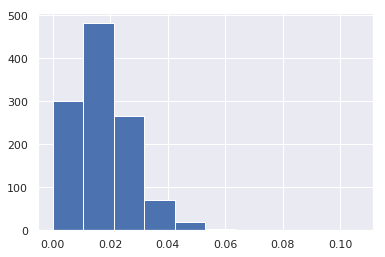

In [41]:
df['CTR'].hist()

## Cost Per Click (CPC)

In [42]:
df['CPC'] = df['Spent'] / df['Clicks']

In [43]:
df['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

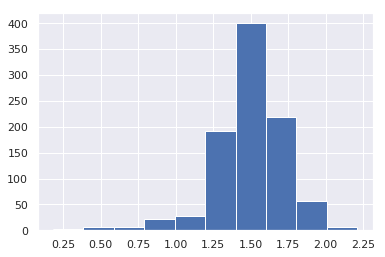

In [44]:
df['CPC'].hist()

Mean spend per click of 1.5 (dollars?)

## Correlations

In [45]:
df.corr()['Spent'].sort_values()

gender_encoded        -0.125022
interest               0.070226
CTR                    0.140952
CPC                    0.165464
age_mean               0.190524
fb_campaign_id         0.403532
ad_id                  0.433053
xyz_campaign_id        0.476689
Approved_Conversion    0.593178
Total_Conversion       0.725379
Impressions            0.970386
Clicks                 0.992906
Spent                  1.000000
Name: Spent, dtype: float64

As we might expect, we've got some strong correlations between the amount we spent and how many impressions and clicks we got. No strong corr with CTR.

## Analyse single campaign

For our next stage in the analysis, we'll look at a specific campaign in more detail and see what we can pull out of it. First of all, let's choose a campaign, the one on which we regularly spend the most money and regularly get the most conversions (and for which we have the most data!) might be a good place to start.

In [46]:
df.groupby('xyz_campaign_id').sum()['Spent']

xyz_campaign_id
916       149.710001
936      2893.369999
1178    55662.149959
Name: Spent, dtype: float64

Looks like campaign '1178' is the one to go for

In [47]:
df_1178 = df[df['xyz_campaign_id']==1178]

In [48]:
df_1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_encoded,age_mean,CTR,CPC
518,1121091,1178,144531,10,1194718,141,254.049996,28,14,1,32,0.011802,1.801773
519,1121092,1178,144531,10,637648,67,122.400000,13,5,1,32,0.010507,1.826866
520,1121094,1178,144531,10,24362,0,0.000000,1,1,1,32,0.000000,NaN
521,1121095,1178,144531,10,459690,50,86.330001,5,2,1,32,0.010877,1.726600
522,1121096,1178,144531,10,750060,86,161.909999,11,2,1,32,0.011466,1.882674


We have some nans in our CPC owing to 0 spent, lets replace those nans.

Explanation: The first thing to note is that we can see a row with no clicks, but that has a conversion, giving us a ROAS of infinity. Nice, but probably not what we want in our data. This could perhaps have happened if a conversion was attributed to the campaign, but either the click wasn't tracked, or occurred at a different time and has been attributed elsewhere.

In [49]:
df_1178 = df_1178.fillna(0)

In [50]:
df_1178 = df_1178.drop(['xyz_campaign_id'], axis=1)

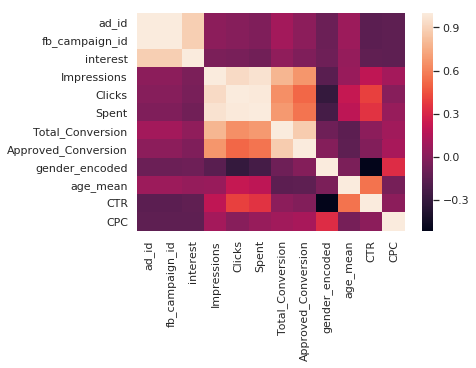

In [51]:
sns.heatmap(df_1178.corr());

Same story of corr between spend, impressions, and conversions

In [52]:
df_1178.corr()['Spent'].sort_values()

gender_encoded        -0.235329
interest              -0.072921
ad_id                 -0.024681
fb_campaign_id        -0.024585
CPC                    0.057305
age_mean               0.195207
CTR                    0.354103
Approved_Conversion    0.561517
Total_Conversion       0.683936
Impressions            0.961916
Clicks                 0.990799
Spent                  1.000000
Name: Spent, dtype: float64

We could next calculate the value of conversions by making assumptions about the product price etc

Question: does spend on ad translate to conversions? 

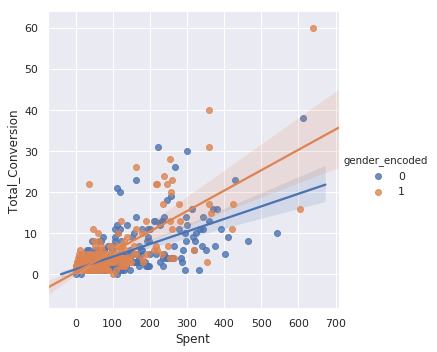

In [53]:
sns.lmplot(x="Spent", y="Total_Conversion", hue="gender_encoded",
               height=5, data=df_1178);

It does appear justified increasing spend on ads, and there is a gender difference, with Males responding stronger to spend. We should confirm this hypothesis by performing a wilcox test, which we use when the data violates the assumption of normality.

The hypothesis being test is:

    Null hypothesis (H0): The difference between the pairs follows a symmetric distribution around zero.
    Alternative hypothesis (HA): The difference between the pairs does not follow a symmetric distribution around zero.

If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

IS THIS CORRECT TEST, DO WE HAVE PAIRS WE CAN USE? In the reference notebook R magically takes care of this for us

## Analysis by interest

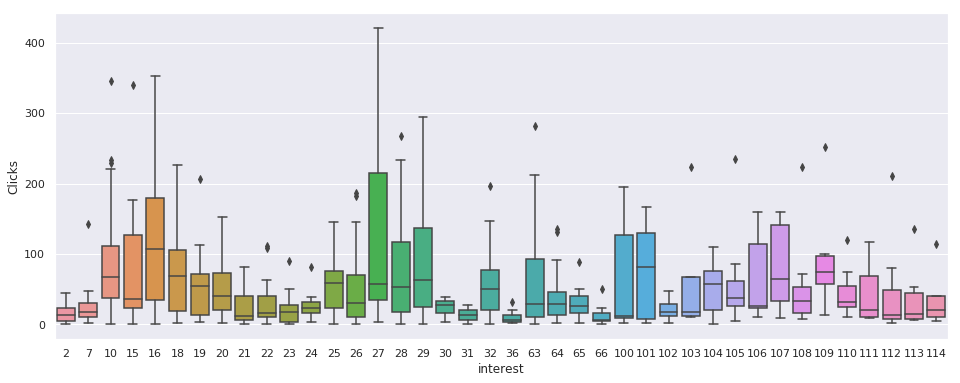

In [54]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 6)

sns.boxplot(x="interest", y="Clicks",
            #hue="gender_encoded", palette=["m", "g"],
            data=df_1178, ax=ax)

We can see that our different interest groups are performing differently;

In [55]:
sns.boxplot(x="age_mean", y="Clicks",
            #hue="gender_encoded", palette=["m", "g"],
            data=df_1178, ax=ax)

To start to work out ROI, we would likely want to start working with data from other sources, such as our website analytics data. As our Facebook ad campaigns can contain plenty information in the URL that sends visitors to our website, we can look at how much website traffic the campaigns generated and how visitors from that campaign interacted with our website.